# connect to db

In [14]:
import pandas
import configparser
import psycopg2

In [15]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [16]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

# q1

In [17]:
sql = " select * from student"

In [18]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_8641/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


# q2

In [19]:
sql = """
select professor.p_name, course.c_name
from professor
inner join course
on professor.p_email = course.p_email
"""

# q3

In [22]:
sql = """
select c_number,count(*) as num_student
from enroll
group by c_number
order by num_student desc
"""

/tmp/ipykernel_8641/1961550415.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

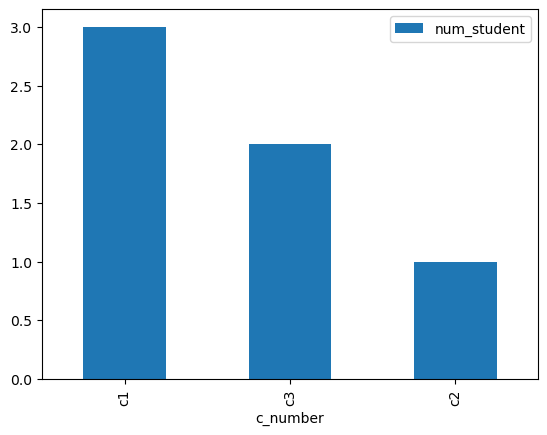

In [23]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x= 'c_number',y= 'num_student')

# q4

In [29]:
sql = """
select  professor.p_name, count(course.c_number) as num_courses_taught
from professor
inner join course on professor.p_email = course.p_email
group by professor.p_name
order by num_courses_taught desc
"""

/tmp/ipykernel_8641/1110521013.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

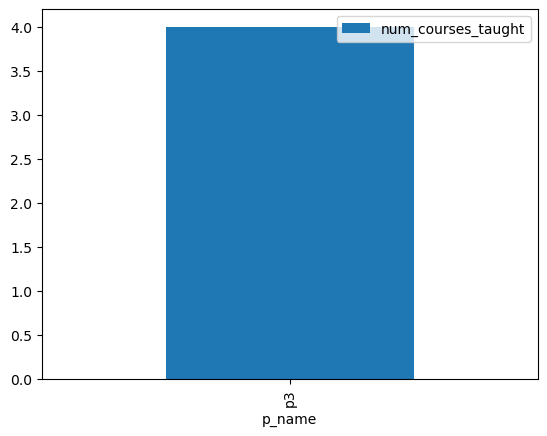

In [27]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x= 'p_name',y= 'num_courses_taught')

# q5

In [30]:
cur = conn.cursor()

In [31]:
sql = """ insert into professor(p_email,p_name,office)
values('p4@jmu.edu' , 'p4' , 'o4')
"""

In [32]:
cur.execute(sql)

In [33]:
conn.commit()

In [34]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_8641/385041841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


# q5.2

In [35]:
cur = conn.cursor()

In [52]:
sql = """ insert into course(c_number,c_name,room,p_email)
values ('c5' , 'linkedin', 'r2' , 'p4@jmu.edu')
"""

In [53]:
cur.execute(sql)

In [54]:
conn.commit()

In [56]:
df = pandas.read_sql_query('select * from course', conn)
df[:]

/tmp/ipykernel_8641/4028193866.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c1,postgresql,r1,p3@jmu.edu
1,c2,mongodb,r2,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c4,facebook,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu
